In [18]:
import pandas as pd 
import geopandas as gpd

## Explication du process 

on merge la densité de population avec le revenu dans un csv 
ensuite on merge ce csv avec le geojson des secteurs de la ville

### 2.Récupération des infos de densité de population par secteur, changement de nom de colonnes et choix parmis celles qui nous intéressent

In [20]:
densite = pd.read_excel("..\data\densite_par_secteur.xlsx")
new_densite = densite[["CD_SECTOR","TOTAL","OPPERVLAKKTE IN HM²"]]
new_densite.head()

,CD_SECTOR,TOTAL,OPPERVLAKKTE IN HM²
0,11001A00-,2474,53.158956
1,11001A01-,2805,67.115758
2,11001A020,752,28.084816
3,11001A030,441,42.812540
4,11001A042,346,25.562366


In [29]:
new_densite.rename(columns = {'TOTAL':'NOMBRE_HAB'}, inplace = True)
new_densite.rename(columns = {'OPPERVLAKKTE IN HM²':'DENSITE_PAR_HECTARE'}, inplace = True)

C:\Users\Décrypte\AppData\Local\Temp\ipykernel_21728\3025819748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_densite.rename(columns = {'TOTAL':'NOMBRE_HAB'}, inplace = True)
C:\Users\Décrypte\AppData\Local\Temp\ipykernel_21728\3025819748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_densite.rename(columns = {'OPPERVLAKKTE IN HM²':'DENSITE_PAR_HECTARE'}, inplace = True)


### 3. Récupération des données de revenus, changement de nom de colonnes et séléction de celle dont on a besoin 

In [22]:
revenu = pd.read_excel("../data/revenu_par_secteur.xlsx")
new_revenu = revenu[["CD_SECTOR","MS_AVG_TOT_NET_TAXABLE_INC","MS_MEDIAN_NET_TAXABLE_INC"]]
new_revenu.head()

,CD_SECTOR,MS_AVG_TOT_NET_TAXABLE_INC,MS_MEDIAN_NET_TAXABLE_INC
0,11001A00-,28979.0,21962.0
1,11001A01-,35113.0,25261.0
2,11001A020,37532.0,25591.0
3,11001A030,28876.0,22651.0
4,11001A042,63624.0,28844.0


In [30]:
new_revenu.rename(columns = {'MS_AVG_TOT_NET_TAXABLE_INC':'REVENU_MOYEN'}, inplace = True)
new_revenu.rename(columns = {'MS_MEDIAN_NET_TAXABLE_INC':'REVENU_MEDIAN'}, inplace = True)

C:\Users\Décrypte\AppData\Local\Temp\ipykernel_21728\3909679622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_revenu.rename(columns = {'MS_AVG_TOT_NET_TAXABLE_INC':'REVENU_MOYEN'}, inplace = True)
C:\Users\Décrypte\AppData\Local\Temp\ipykernel_21728\3909679622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_revenu.rename(columns = {'MS_MEDIAN_NET_TAXABLE_INC':'REVENU_MEDIAN'}, inplace = True)


### 4. Merge de la densité et du revenu sur la col du code du secteur

In [24]:
revenu_densite = new_revenu.merge(new_densite, on="CD_SECTOR")
revenu_densite.head()

,CD_SECTOR,REVENU_MOYEN,REVENU_MEDIAN,NOMBRE_HAB,DENSITE_PAR_HECTARE
0,11001A00-,28979.0,21962.0,2474,53.158956
1,11001A00-,29689.0,22337.0,2474,53.158956
2,11001A00-,31879.0,22409.0,2474,53.158956
3,11001A00-,31803.0,23184.0,2474,53.158956
4,11001A00-,32531.0,24239.0,2474,53.158956


### 5. Récupération du fichier des secteur et changement de nom de colonne

,ogc_fid,CD_SECTOR,tx_sector_descr_nl,tx_sector_descr_fr,tx_sector_descr_de,cd_sub_munty,tx_sub_munty_nl,tx_sub_munty_fr,tx_munty_dstr,cd_munty_refnis,...,tx_rgn_descr_fr,tx_rgn_descr_de,cd_country,cd_nuts_lvl1,cd_nuts_lvl2,cd_nuts_lvl3,ms_area_ha,ms_perimeter_m,dt_situation,geometry
0,13168,62063A00-,SAINT-LAMBERT,SAINT-LAMBERT,SAINT-LAMBERT,62063A,"LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...","LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...",NaN,62063,...,Région wallonne,Wallonische Region,BE,BE3,BE33,BE332,28.876176,2437,2023-01-01,"POLYGON ((235707.98450 148952.23050, 235673.26..."
1,13169,62063A01-,FERONSTREE,FERONSTREE,FERONSTREE,62063A,"LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...","LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...",NaN,62063,...,Région wallonne,Wallonische Region,BE,BE3,BE33,BE332,31.657573,2734,2023-01-01,"POLYGON ((236062.06250 149123.38670, 236040.68..."
2,13170,62063A02-,PIERREUSE,PIERREUSE,PIERREUSE,62063A,"LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...","LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...",NaN,62063,...,Région wallonne,Wallonische Region,BE,BE3,BE33,BE332,13.837131,1660,2023-01-01,"POLYGON ((235234.39070 149677.37110, 235205.15..."
3,13171,62063A03-,SAINT-JEAN,SAINT-JEAN,SAINT-JEAN,62063A,"LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...","LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...",NaN,62063,...,Région wallonne,Wallonische Region,BE,BE3,BE33,BE332,20.308784,1862,2023-01-01,"POLYGON ((235276.48450 148666.40250, 235166.84..."
4,13172,62063A04-,CATHEDRALE,CATHEDRALE,CATHEDRALE,62063A,"LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...","LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...",NaN,62063,...,Région wallonne,Wallonische Region,BE,BE3,BE33,BE332,19.893647,1982,2023-01-01,"POLYGON ((235523.98450 148531.76170, 235380.48..."


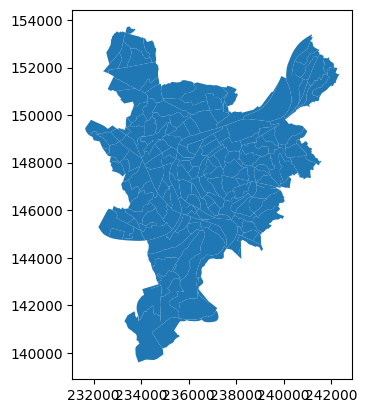

In [42]:
liege = gpd.read_file("../data/secteurs/liege_secteur.geojson")
liege.plot(aspect=1)
liege.rename(columns = {'cd_sector':'CD_SECTOR'}, inplace = True)
liege.head()


### 6. merge du geojson avec les revenu et la densité + tentative de changement de type de projection

In [45]:
secteur_densite_revenu = liege.merge(revenu_densite, on="CD_SECTOR")
secteur_densite_revenu.head()


final = secteur_densite_revenu.to_crs("EPSG:4326")
final_2 = final.to_crs("wgs84")

final_2.to_file("../data/revenu_densite_geojson/liege_revenu_densite.geojson", driver="GeoJSON")


<Axes: >

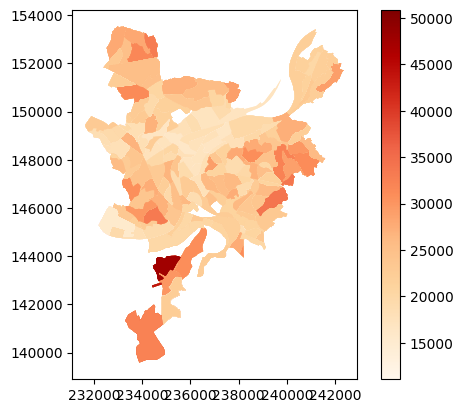

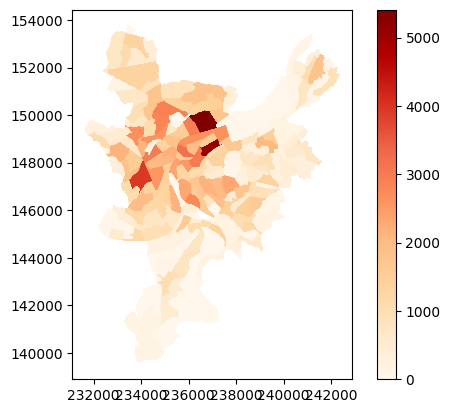

In [49]:
secteur_densite_revenu.plot(aspect=1,column="REVENU_MEDIAN",legend=True, cmap="OrRd")
secteur_densite_revenu.plot(aspect=1,column="NOMBRE_HAB",legend=True, cmap="OrRd")


### Script pour export toutes les villes

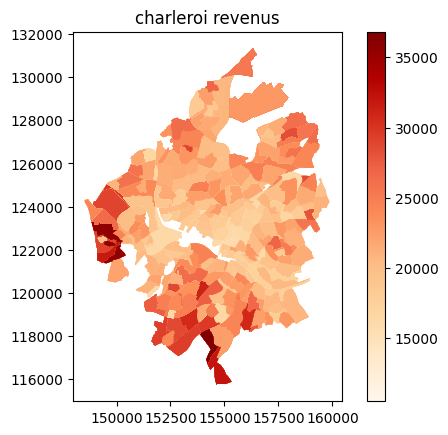

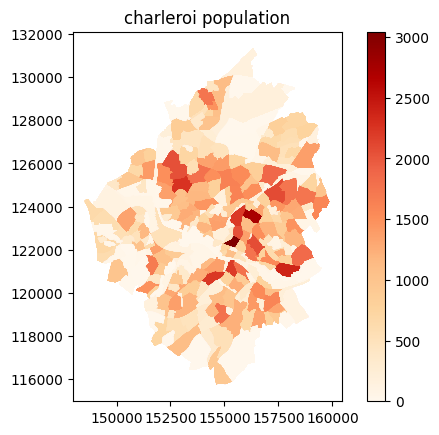

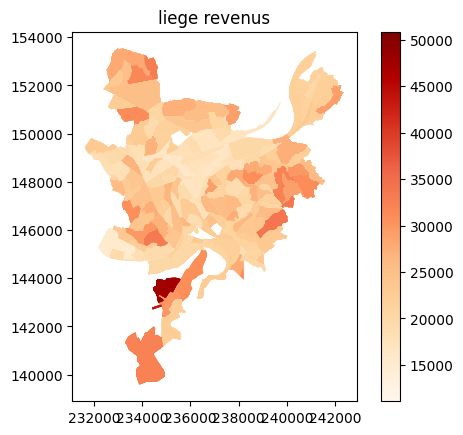

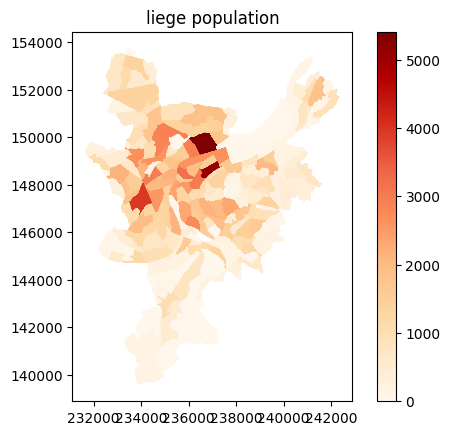

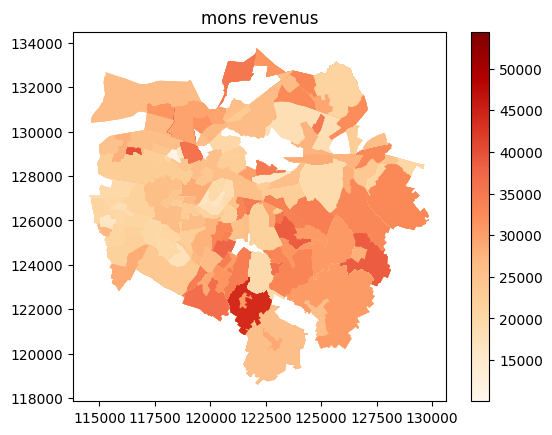

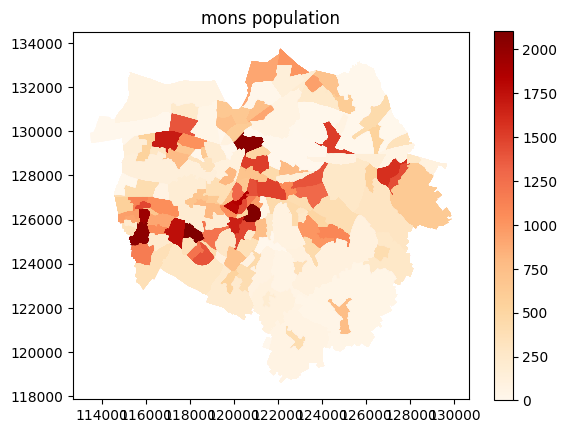

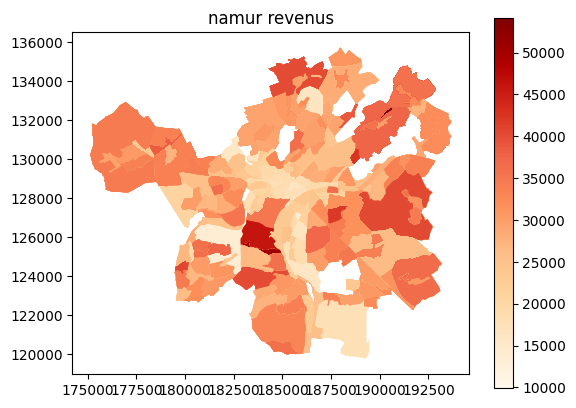

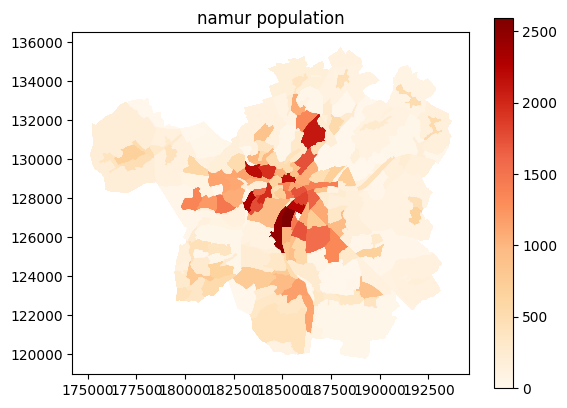

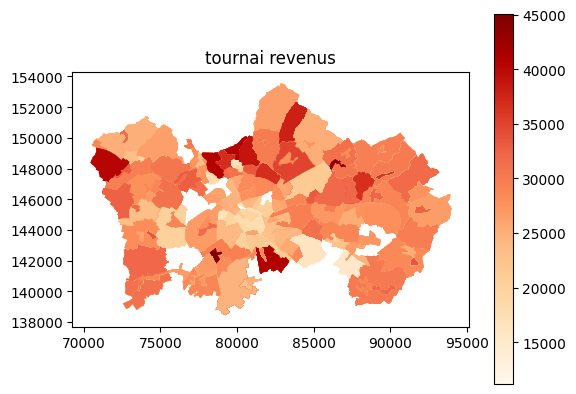

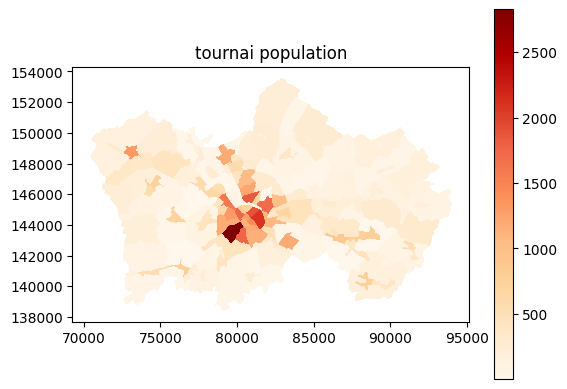

In [52]:
list_ville = ["charleroi", "liege", "mons", "namur", "tournai"]

for city in list_ville : 
    ville = gpd.read_file(f"../data/secteurs/{city}_secteur.geojson")
    ville.rename(columns = {'cd_sector':'CD_SECTOR'}, inplace = True)
    ville.head()

    secteur_densite_revenu = ville.merge(revenu_densite, on="CD_SECTOR")
    secteur_densite_revenu.head()

    ax = secteur_densite_revenu.plot(aspect=1,column="REVENU_MEDIAN",legend=True, cmap="OrRd")
    ax.set_title(f"{city} revenus")
    ax2 = secteur_densite_revenu.plot(aspect=1,column="NOMBRE_HAB",legend=True, cmap="OrRd")
    ax2.set_title(f"{city} population")

    
    final = secteur_densite_revenu.to_crs("EPSG:4326")
    final_2 = final.to_crs("wgs84")

    final_2.to_file(f"../data/revenu_densite_geojson/{city}_revenu_densite.geojson", driver="GeoJSON")